In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2021-12-09 16:40:56.455114: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-09 16:40:56.506724: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-09 16:40:56.593976: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-09 16:40:56.594935: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "../input/cat-and-dog/training_set/training_set/",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )


Found 8005 images belonging to 2 classes.


### Preprocessing the test Data using ImageDataGenerator

In [4]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "../input/cat-and-dog/test_set/test_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 2023 images belonging to 2 classes.


# Creating the Model

### Importing useful models for CNN Layers

In [5]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [6]:
from tensorflow.keras.regularizers import l2

In [7]:
cnn = tf.keras.models.Sequential()

2021-12-09 16:41:01.961340: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-09 16:41:01.962187: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-09 16:41:01.962808: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-09 16:41:01.963716: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-09 16:41:01.964404: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [13]:
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [15]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [16]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

2021-12-09 16:41:03.363611: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2021-12-09 16:41:04.870056: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


251/251 [==============================] - 66s 237ms/step - loss: 0.8769 - accuracy: 0.5836 - val_loss: 0.7602 - val_accuracy: 0.6915
Epoch 2/15
251/251 [==============================] - 35s 138ms/step - loss: 0.7014 - accuracy: 0.6723 - val_loss: 0.7429 - val_accuracy: 0.7227
Epoch 3/15
251/251 [==============================] - 34s 137ms/step - loss: 0.6521 - accuracy: 0.6908 - val_loss: 0.6242 - val_accuracy: 0.7390
Epoch 4/15
251/251 [==============================] - 35s 139ms/step - loss: 0.6204 - accuracy: 0.7093 - val_loss: 0.6099 - val_accuracy: 0.7459
Epoch 5/15
251/251 [==============================] - 35s 138ms/step - loss: 0.5918 - accuracy: 0.7210 - val_loss: 0.6025 - val_accuracy: 0.7533
Epoch 6/15
251/251 [==============================] - 35s 137ms/step - loss: 0.5750 - accuracy: 0.7265 - val_loss: 0.5585 - val_accuracy: 0.7400
Epoch 7/15
251/251 [==============================] - 35s 138ms/step - loss: 0.5450 - accuracy: 0.7433 - val_loss: 0.6206 - val_accuracy: 0.7

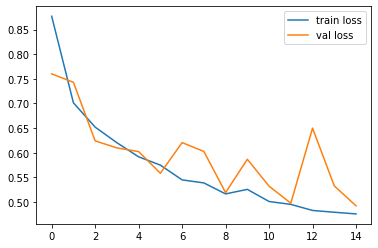

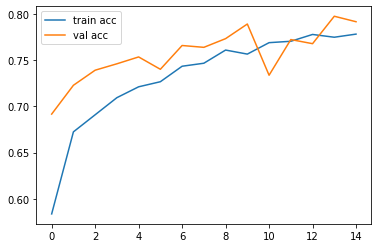

In [17]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [18]:
from tensorflow.keras.models import load_model

cnn.save('./model_rcat_dog.h5')

In [19]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('../input/cat-and-dog/training_set/training_set/dogs/dog.1023.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [20]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog
